### 1. <a id='importation'>Détail des données fournies</a>

In [48]:
import time
import warnings

import matplotlib.pyplot as plt
import missingno as msno
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score

# Ignorer les avertissements
warnings.filterwarnings('ignore')
path = "../data/"

DELIMITER = "--------------------------------"

---

### 2. <a id='chargement'>Chargement et initialisation des données</a>

In [49]:
#On vient charger les différents dataset
employee_df = pd.read_csv(path + "employee_survey_data.csv")
general_df = pd.read_csv(path + "general_data.csv")
manager_df = pd.read_csv(path + "manager_survey_data.csv")
in_time_df = pd.read_csv(path + "in_time.csv")
out_time_df = pd.read_csv(path + "out_time.csv")

dataframes = [
    ("employee_df", employee_df),
    ("general_df", general_df),
    ("manager_df", manager_df),
    ("in_time_df", in_time_df),
    ("out_time_df", out_time_df)
]

for name, df in dataframes:
    print(DELIMITER)
    print(f"Nom du DataFrame : {name}")
    print(f"Description : {df.describe()}")
    print(f"Valeurs nulles : ")
    print(f"{df.isnull().sum()}")


--------------------------------
Nom du DataFrame : employee_df
Description :        EmployeeID  EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance
count   4410.0000                4385.0000        4390.0000        4372.0000
mean    2205.5000                   2.7236           2.7282           2.7614
std     1273.2017                   1.0928           1.1013           0.7062
min        1.0000                   1.0000           1.0000           1.0000
25%     1103.2500                   2.0000           2.0000           2.0000
50%     2205.5000                   3.0000           3.0000           3.0000
75%     3307.7500                   4.0000           4.0000           3.0000
max     4410.0000                   4.0000           4.0000           4.0000
Valeurs nulles : 
EmployeeID                  0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
dtype: int64
--------------------------------
Nom du DataFrame : general_df
Description :  

---

Résumé des différentes données présentes dans les dataset:

**Dataset employee_survey_data**
| #  | Colonne                   | Type      | Description                                    | Valeurs manquantes | Moyenne | Médiane | Min | Max |
|----|---------------------------|-----------|-----------------------------------------------|--------------------|---------|---------|-----|-----|
| 1  | EmployeeID                | int64     | Identifiant unique pour chaque employé       | 0                  | -       | -       | -   | -   |
| 2  | EnvironmentSatisfaction   | float64   | Satisfaction par rapport à l’environnement   | 25                 | 2.72    | 3       | 1   | 4   |
| 3  | JobSatisfaction           | float64   | Satisfaction au travail                      | 20                 | 2.73    | 3       | 1   | 4   |
| 4  | WorkLifeBalance           | float64   | Équilibre vie pro/perso                      | 38                 | 2.76    | 3       | 1   | 4   |

**Dataset general_data**
| #  | Colonne                     | Type      | Description                                    | Valeurs manquantes | Moyenne   | Médiane | Min | Max      |
|----|-----------------------------|-----------|-----------------------------------------------|--------------------|-----------|---------|-----|----------|
| 1  | Age                         | int64     | Âge des employés                              | 0                  | 36.92     | 36      | 18  | 60       |
| 2  | Attrition                   | object    | Indique si l'employé a quitté l'entreprise    | 0                  | -         | -       | -   | -        |
| 3  | BusinessTravel              | object    | Fréquence des déplacements professionnels     | 0                  | -         | -       | -   | -        |
| 4  | Department                  | object    | Département auquel l'employé appartient       | 0                  | -         | -       | -   | -        |
| 5  | DistanceFromHome            | int64     | Distance entre domicile et lieu de travail    | 0                  | 9.19      | 7       | 1   | 29       |
| 6  | Education                   | int64     | Niveau d'éducation (1 à 5)                    | 0                  | 2.91      | 3       | 1   | 5        |
| 7  | EducationField              | object    | Domaine d'étude                               | 0                  | -         | -       | -   | -        |
| 8  | EmployeeCount               | int64     | Toujours égal à 1                             | 0                  | 1.0       | 1       | 1   | 1        |
| 9  | EmployeeID                  | int64     | Identifiant unique pour chaque employé        | 0                  | -         | -       | 1   | 4410     |
| 10 | Gender                      | object    | Genre de l'employé                            | 0                  | -         | -       | -   | -        |
| 11 | JobLevel                    | int64     | Niveau de poste (1 à 5)                       | 0                  | 2.06      | 2       | 1   | 5        |
| 12 | JobRole                     | object    | Intitulé du poste                             | 0                  | -         | -       | -   | -        |
| 13 | MaritalStatus               | object    | État civil                                    | 0                  | -         | -       | -   | -        |
| 14 | MonthlyIncome               | int64     | Revenu mensuel (en dollars)                  | 0                  | 65,029    | 49,190  | 10,090 | 199,990 |
| 15 | NumCompaniesWorked          | float64   | Nombre d'entreprises où l'employé a travaillé| 19                 | 2.69      | 2       | 0   | 9        |
| 16 | Over18                      | object    | Toujours "Y"                                | 0                  | -         | -       | -   | -        |
| 17 | PercentSalaryHike           | int64     | Augmentation de salaire en %                  | 0                  | 15.21     | 14      | 11  | 25       |
| 18 | StandardHours               | int64     | Toujours égal à 8                             | 0                  | 8.0       | 8       | 8   | 8        |
| 19 | StockOptionLevel            | int64     | Niveau d'options sur actions (0 à 3)         | 0                  | 0.79      | 1       | 0   | 3        |
| 20 | TotalWorkingYears           | float64   | Années totales d'expérience                  | 9                  | 11.28     | 10      | 0   | 40       |
| 21 | TrainingTimesLastYear       | int64     | Nombre de formations l'année précédente       | 0                  | 2.80      | 3       | 0   | 6        |
| 22 | YearsAtCompany              | int64     | Années passées dans l'entreprise              | 0                  | 7.01      | 5       | 0   | 40       |
| 23 | YearsSinceLastPromotion     | int64     | Années depuis la dernière promotion           | 0                  | 2.19      | 1       | 0   | 15       |
| 24 | YearsWithCurrManager        | int64     | Années passées avec le manager actuel         | 0                  | 4.12      | 3       | 0   | 17       |


**Dataset manager_survey_data**
| #  | Colonne              | Type    | Description                               | Valeurs manquantes | Moyenne | Médiane | Min | Max | Distribution attendue |
|----|----------------------|---------|-------------------------------------------|--------------------|---------|---------|-----|-----|----------------------|
| 1  | EmployeeID          | int64   | Identifiant unique pour chaque employé   | 0                  | -       | -       | -   | -   | Unique, sans répétition |
| 2  | JobInvolvement      | int64   | Implication dans le travail (1 à 4)      | 0                  | 2.73    | 3       | 1   | 4   | Répartition probable autour de 3 |
| 3  | PerformanceRating   | int64   | Évaluation de la performance (3 à 4)     | 0                  | 3.15    | 3       | 3   | 4   | Très concentré sur 3 et 4 |


**Dataset in_time**
| #  | Colonne              | Type    | Description                               | Valeurs manquantes |
|----|----------------------|---------|-------------------------------------------|--------------------|
| 1  | Unnamed: 0          | int64   | Identifiant unique pour chaque employé   | 0                  |
| 2  | 2015-01-01      | float64   | Date d'arrivée      | 4410                  |
| 3  | 2015-01-02   | object   | Date d'arrivée     | 209                  |
| ...  | 2015-31-12   | object   | Date de départ     | 213                  |

**Dataset out_time**
| #  | Colonne              | Type    | Description                               | Valeurs manquantes |
|----|----------------------|---------|-------------------------------------------|--------------------|
| 1  | Unnamed: 0          | int64   | Identifiant unique pour chaque employé   | 0                  |
| 2  | 2015-01-01      | float64   | Date de départ      | 4410                  |
| 3  | 2015-01-02   | object   | Date de départ     | 209                  |
| ...  | 2015-31-12   | object   | Date de départ     | 213                  |

---


### 3. <a id='merge'>Pré-traitements spécifique</a>

Notre objectif est de venir merger ces différents dataset afin de travailler avec un seul DataFrame.
En observant les différentes caractéristiques des dataset, on s'est aperçu qu'on peut dès à présent fusionner tous les dataset sauf "in_time" et "out_time" car les informations présentes sont très différentes des autres dataset, sur la forme ou le fond.
On va donc venir synthétiser ces données afin de récupérer l'heure totale de travail pour chaque employé.


In [50]:
in_time_df = in_time_df.rename(columns={"Unnamed: 0": "EmployeeID"})
out_time_df = out_time_df.rename(columns={"Unnamed: 0": "EmployeeID"})

### Vérifications concernant les 2 dataset :

# Valeurs des EmployeeID
if not in_time_df['EmployeeID'].equals(out_time_df['EmployeeID']):
    print("Les EmployeeID ne correspondent pas entre les dataset : in_time_df et out_time_df")

# Correspondance des valeurs NA
in_time_na = in_time_df.isna()
out_time_na = out_time_df.isna()
if not in_time_na.equals(out_time_na):
    print("Les valeurs NA dans in_time_df et out_time_df ne correspondent pas")

### On est maintenant sûr que les dataset sont conformes et peuvent donc être fusionnés, on va venir convertir les objets en date afin de récuperer les heures totales.

for col in in_time_df.columns[1:]:
    in_time_df[col] = pd.to_datetime(in_time_df[col], errors='coerce')
    out_time_df[col] = pd.to_datetime(out_time_df[col], errors='coerce')

time_difference = out_time_df.iloc[:, 1:] - in_time_df.iloc[:, 1:]

time_difference_in_hours = time_difference.apply(lambda row: row.dt.total_seconds() / 3600, axis=1)
total_hours_per_employee = time_difference_in_hours.sum(axis=1, skipna=True).round(2)

out_time_df["Total_Hours"] = total_hours_per_employee
total_hours_df = out_time_df[["EmployeeID", "Total_Hours"]]
total_hours_df

,EmployeeID,Total_Hours
0,1,1710.6900
1,2,1821.6800
2,3,1697.2000
3,4,1690.5100
4,5,1961.5100
...,...,...
4405,4406,2070.9100
4406,4407,1468.4000
4407,4408,1780.2300
4408,4409,2287.7200


### 3. <a id='merge'>Merge et sauvegarde des datasets</a>

In [51]:
company_df = general_df.merge(employee_df, on='EmployeeID').merge(manager_df, on='EmployeeID').merge(total_hours_df,
                                                                                                     on='EmployeeID')
company_df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Total_Hours
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,6,1,0,0,3.0000,4.0000,2.0000,3,3,1710.6900
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,3,5,1,4,3.0000,2.0000,4.0000,2,4,1821.6800
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,2,5,0,3,2.0000,2.0000,1.0000,3,3,1697.2000
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,5,8,7,5,4.0000,4.0000,3.0000,2,3,1690.5100
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,2,6,0,4,4.0000,1.0000,3.0000,3,3,1961.5100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,5,3,0,2,4.0000,1.0000,3.0000,3,3,2070.9100
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2,3,0,2,4.0000,4.0000,3.0000,2,3,1468.4000
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,4,4,1,2,1.0000,3.0000,3.0000,3,4,1780.2300
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,2,9,7,8,4.0000,1.0000,3.0000,2,3,2287.7200


---

### 4. <a id='apercu'>Aperçu général</a>

In [52]:
print(f"Nombre de lignes : {company_df.shape[0]}")
print(f"Nombre de colonnes : {company_df.shape[1]}")

Nombre de lignes : 4410
Nombre de colonnes : 30


In [53]:
print("Informations de base :")
company_df.info()

Informations de base :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  N

In [54]:
print(f"Sommaire des statistiques : \n{company_df.describe()}")

Sommaire des statistiques : 
            Age  DistanceFromHome  Education  EmployeeCount  EmployeeID  \
count 4410.0000         4410.0000  4410.0000      4410.0000   4410.0000   
mean    36.9238            9.1925     2.9129         1.0000   2205.5000   
std      9.1333            8.1050     1.0239         0.0000   1273.2017   
min     18.0000            1.0000     1.0000         1.0000      1.0000   
25%     30.0000            2.0000     2.0000         1.0000   1103.2500   
50%     36.0000            7.0000     3.0000         1.0000   2205.5000   
75%     43.0000           14.0000     4.0000         1.0000   3307.7500   
max     60.0000           29.0000     5.0000         1.0000   4410.0000   

       JobLevel  MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  \
count 4410.0000      4410.0000           4391.0000          4410.0000   
mean     2.0639     65029.3129              2.6948            15.2095   
std      1.1067     47068.8886              2.4989             3.6591   
min

Suppression des colonnes inutiles :

Après étude des différentes colonnes, on peut voir que les colonnes `EmployeeCount` et `Over18` et `StandardHours` ne contiennent qu'une seule valeur. On peut donc les supprimer. Le `Gender` est une donnée qui peut susciter de la discrimination, d'un point de vue éthique, on a décidé de la supprimer. L'`EmployeeID` est une colonne unique pour chaque employé, on peut donc la supprimer également.

In [55]:
company_df.drop(['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeID', 'Gender', 'MaritalStatus'], axis=1,
                inplace=True)

Ethique, on a décidé de supprimer la colonne `Gender` qui peut susciter de la discrimination. On a également décidé de modifier la colonne Age afin de la rendre plus anonyme.

In [56]:
def categorize_age(df):
    bins = [0, 20, 30, 36, 44, float('inf')]
    labels = ['<=20', '21-30', '31-36', '37-43', '>44']
    df['Age'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)
    return df


company_df = categorize_age(company_df)

In [57]:
print("Nombre de valeurs uniques par colonne :")
for column in company_df.columns:
    print(f"- {column} : {company_df[column].nunique()} valeurs uniques")

Nombre de valeurs uniques par colonne :
- Age : 5 valeurs uniques
- Attrition : 2 valeurs uniques
- BusinessTravel : 3 valeurs uniques
- Department : 3 valeurs uniques
- DistanceFromHome : 29 valeurs uniques
- Education : 5 valeurs uniques
- EducationField : 6 valeurs uniques
- JobLevel : 5 valeurs uniques
- JobRole : 9 valeurs uniques
- MonthlyIncome : 1349 valeurs uniques
- NumCompaniesWorked : 10 valeurs uniques
- PercentSalaryHike : 15 valeurs uniques
- StockOptionLevel : 4 valeurs uniques
- TotalWorkingYears : 40 valeurs uniques
- TrainingTimesLastYear : 7 valeurs uniques
- YearsAtCompany : 37 valeurs uniques
- YearsSinceLastPromotion : 16 valeurs uniques
- YearsWithCurrManager : 18 valeurs uniques
- EnvironmentSatisfaction : 4 valeurs uniques
- JobSatisfaction : 4 valeurs uniques
- WorkLifeBalance : 4 valeurs uniques
- JobInvolvement : 4 valeurs uniques
- PerformanceRating : 2 valeurs uniques
- Total_Hours : 4300 valeurs uniques


In [58]:
display(company_df.head())

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,JobLevel,JobRole,MonthlyIncome,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Total_Hours
0,>44,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Healthcare Representative,131160,...,6,1,0,0,3.0000,4.0000,2.0000,3,3,1710.6900
1,31-36,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Research Scientist,41890,...,3,5,1,4,3.0000,2.0000,4.0000,2,4,1821.6800
2,31-36,No,Travel_Frequently,Research & Development,17,4,Other,4,Sales Executive,193280,...,2,5,0,3,2.0000,2.0000,1.0000,3,3,1697.2000
3,37-43,No,Non-Travel,Research & Development,2,5,Life Sciences,3,Human Resources,83210,...,5,8,7,5,4.0000,4.0000,3.0000,2,3,1690.5100
4,31-36,No,Travel_Rarely,Research & Development,10,1,Medical,1,Sales Executive,23420,...,2,6,0,4,4.0000,1.0000,3.0000,3,3,1961.5100


---

### 5. <a id='missing-check'>Détection des valeurs manquantes</a>

Nous vérifions ici que toutes les colonnes ont leurs valeurs remplies.

Valeurs manquantes par colonne :
NumCompaniesWorked         19
TotalWorkingYears           9
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
dtype: int64


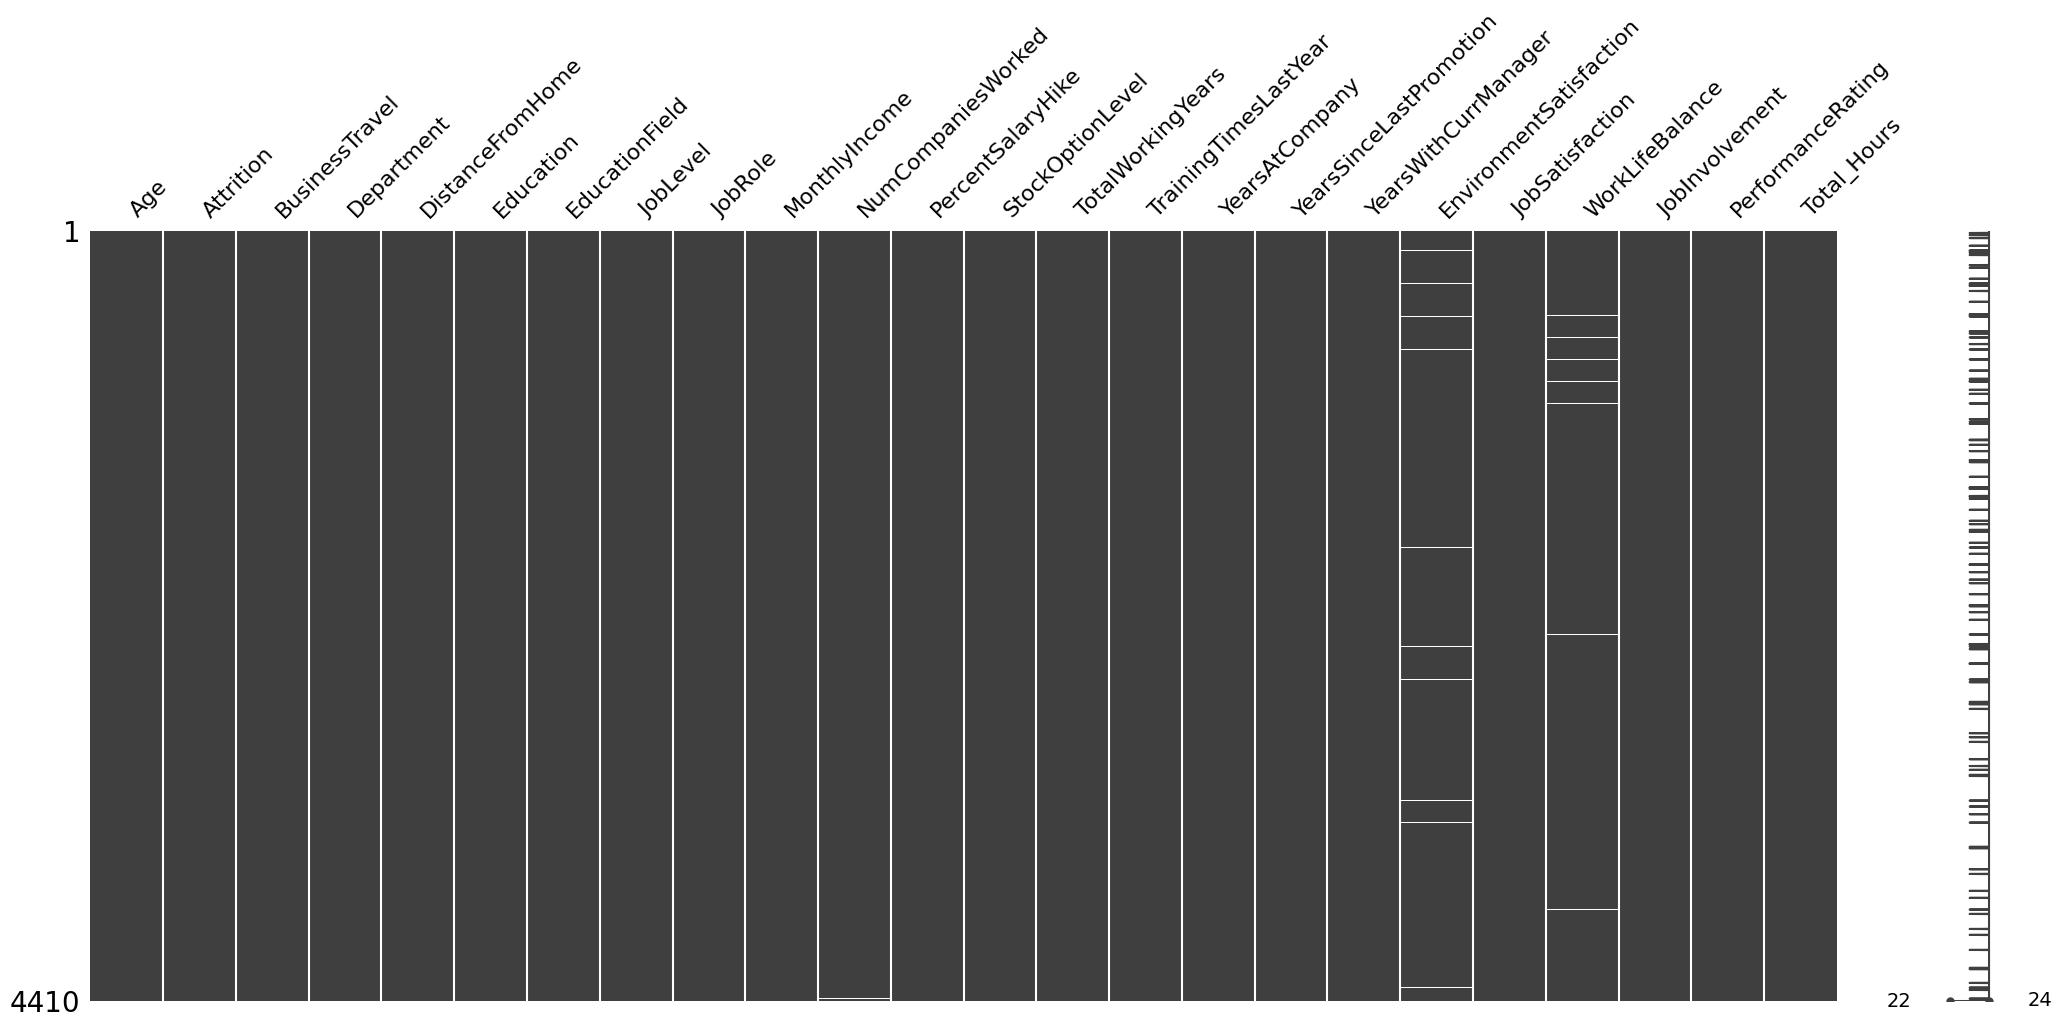

In [59]:
def check_missing_values(df):
    if (df.isnull().sum() > 0).any():
        missing_values = df.isnull().sum()[df.isnull().sum() > 0]
        print("Valeurs manquantes par colonne :")
        print(missing_values)
    else:
        print("Il n'y a pas de valeurs manquantes dans le dataset")
    msno.matrix(df)
    plt.show()


check_missing_values(company_df)

On peut remarquer qu'il existe des données manquantes dans certaines colonnes de notre dataset.

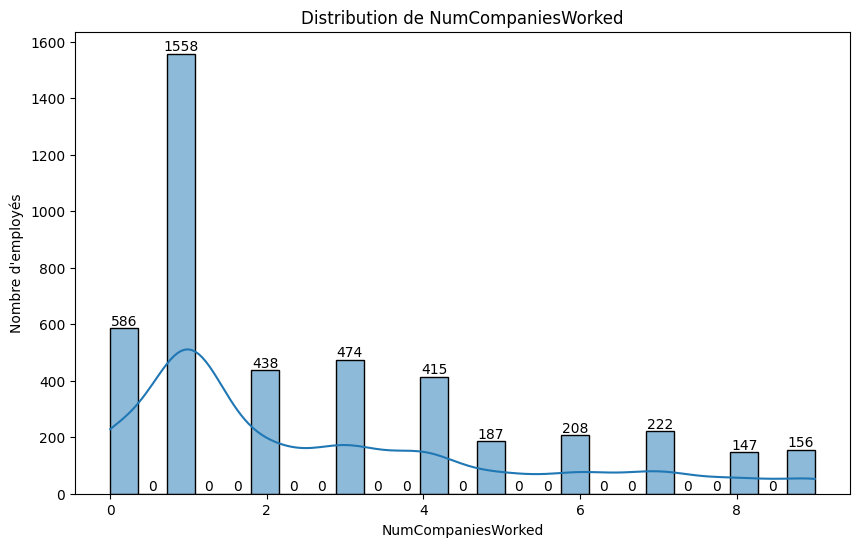

--------------------------------


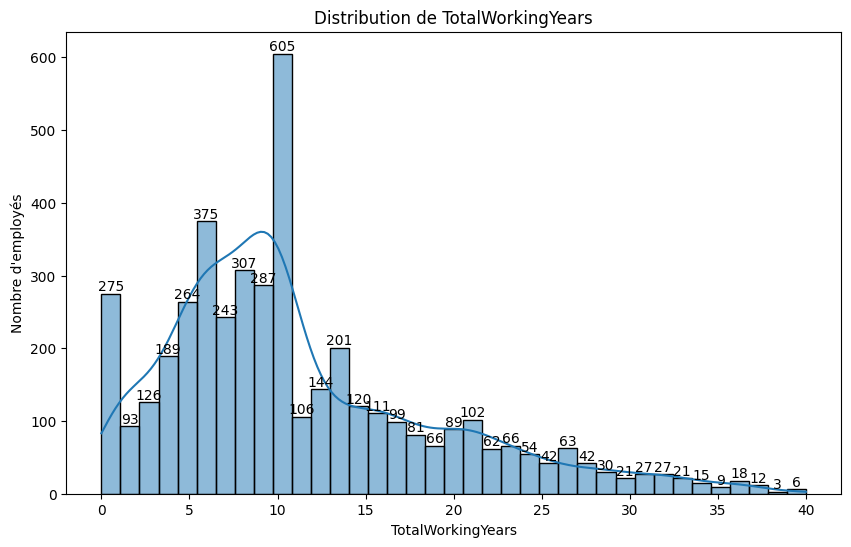

--------------------------------


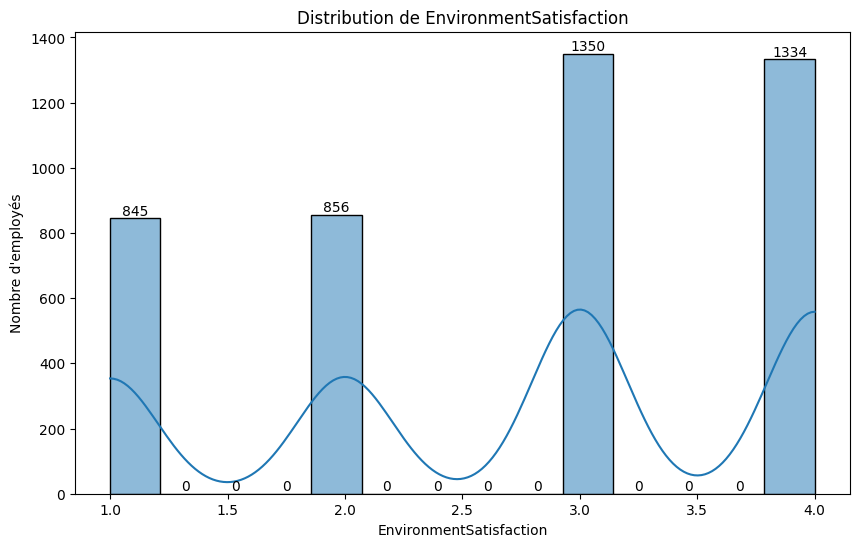

--------------------------------


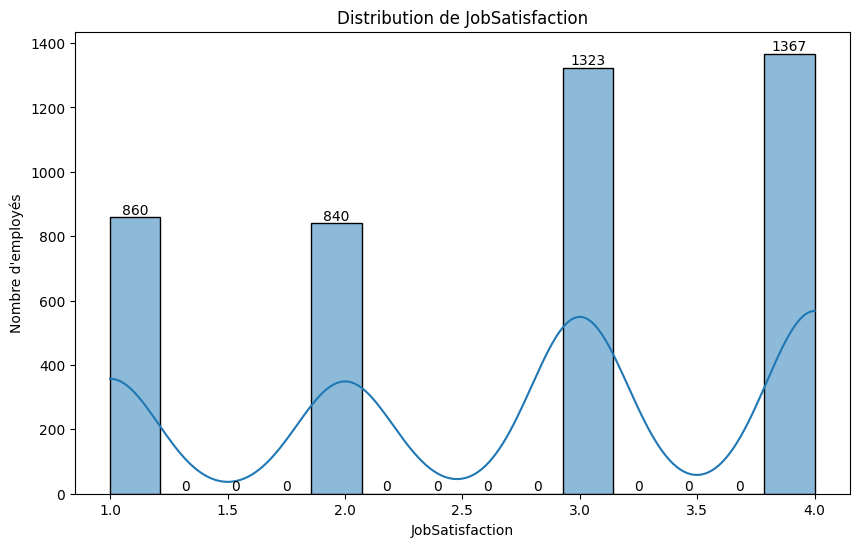

--------------------------------


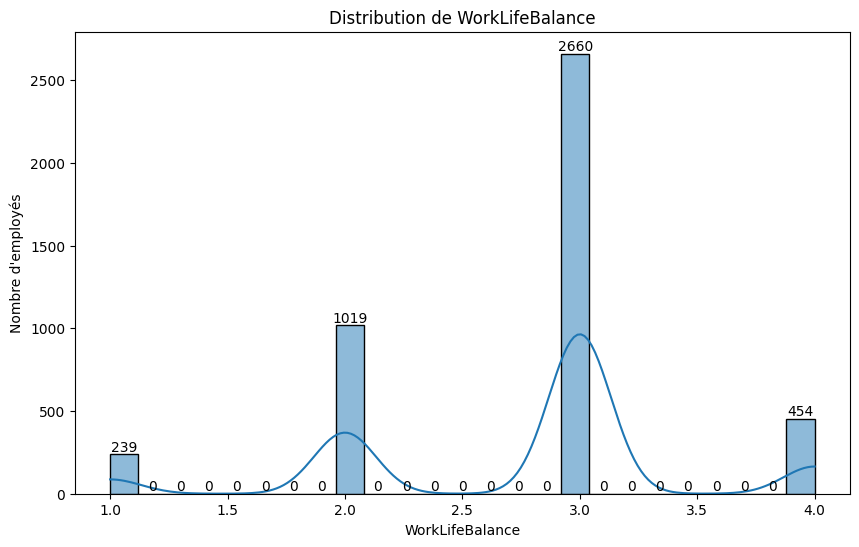

--------------------------------


,NumCompaniesWorked,TotalWorkingYears,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
count,4391.0000,4401.0000,4385.0000,4390.0000,4372.0000
mean,2.6948,11.2799,2.7236,2.7282,2.7614
std,2.4989,7.7822,1.0928,1.1013,0.7062
min,0.0000,0.0000,1.0000,1.0000,1.0000
25%,1.0000,6.0000,2.0000,2.0000,2.0000
50%,2.0000,10.0000,3.0000,3.0000,3.0000
75%,4.0000,15.0000,4.0000,4.0000,3.0000
max,9.0000,40.0000,4.0000,4.0000,4.0000


In [60]:
# Distribution des colonnes présentant des valeurs manquantes
missing_values_columns = ['NumCompaniesWorked', 'TotalWorkingYears', 'EnvironmentSatisfaction', 'JobSatisfaction',
                          'WorkLifeBalance']
for column in missing_values_columns:
    plt.figure(figsize=(10, 6))
    ax = sns.histplot(company_df[column], kde=True)
    plt.title(f'Distribution de {column}')
    plt.xlabel(column)
    plt.ylabel('Nombre d\'employés')

    for i in ax.containers:
        ax.bar_label(i)

    plt.show()
    print(DELIMITER)
company_df[missing_values_columns].describe()

Grâce à l'étude des colonnes où il manque des valeurs, nous pouvons observer que la plupart d'entre-elles sont assez assymétriques.<br>
Nous avons donc décidés d'ajouter la médiane (Ici le 50%) lors du manque d'une valeur. <br>
La moyenne aurait été possible si les données étaient plutôt symétriques, mais ce n'est pas le cas ici.

---

### 6. <a id='doublons'>Détection des valeurs dupliquées</a>

In [61]:
def check_duplicates(df):
    if df.duplicated().sum() > 0:
        print(f"Nombre de valeurs dupliquées : {df.duplicated().sum()}")
    else:
        print("Il n'y a pas de valeurs dupliquées dans le dataset")


check_duplicates(company_df)

Il n'y a pas de valeurs dupliquées dans le dataset


---

### 7. <a id='types'>Vérification des types de données</a>

In [62]:
#Valeurs numériques
numerical_columns = company_df.select_dtypes(include=['int64', 'float64']).columns
print(numerical_columns)

#Valeurs non numériques
categorical_columns = company_df.select_dtypes(include=['object', 'category']).columns
print(categorical_columns)

print(f"Nombre de colonnes traitées : {len(numerical_columns) + len(categorical_columns)}")
print(f"Nombre de colonnes dans le dataset : {company_df.shape[1]}")


Index(['DistanceFromHome', 'Education', 'JobLevel', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'PerformanceRating', 'Total_Hours'],
      dtype='object')
Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'EducationField',
       'JobRole'],
      dtype='object')
Nombre de colonnes traitées : 24
Nombre de colonnes dans le dataset : 24


On peut voir qu'il y a le même nombre entre les colonnes traitées et celles dans le dataset, donc toutes les variables ont été traitées.

---

### 8. <a id='pipeline'>Pipeline de traitement des données</a>

In [63]:
num_features = numerical_columns.tolist()
cat_features = categorical_columns.tolist()

# Pipeline pour les variables numériques
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Pipeline pour les variables catégorique
cat_pipeline = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Pipeline spécifique pour la colonne Attrition
attrition_pipeline = Pipeline([
    ('bool_transform', FunctionTransformer(lambda x: x == 'Yes', validate=False))
])

# Pipeline de preprocessing
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, [col for col in cat_features if col != 'Attrition']),
    ('cat_specific', attrition_pipeline, ['Attrition'])
])

# Appliquer la transformation sur les données d'origine
company_transformed_df = preprocessor.fit_transform(company_df)

cat_encoder = preprocessor.named_transformers_['cat'].named_steps['encoder']
cat_one_hot_columns = cat_encoder.get_feature_names_out([col for col in cat_features if col != 'Attrition']).tolist()

# Ajouter la colonne `Attrition` traitée
final_columns = num_features + cat_one_hot_columns + ['Attrition']

# Créer le DataFrame transformé
processed_df = pd.DataFrame(company_transformed_df, columns=final_columns)

# Afficher les premières lignes du DataFrame transformé
processed_df.head()


,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,...,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Attrition
0,-0.3939,-0.8917,-0.9615,1.4051,-0.6785,-1.1506,-0.9320,-1.3221,2.4834,-0.9810,...,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.0996,-1.8684,-0.9615,-0.4917,-1.0795,2.1293,0.2420,-0.6789,0.1557,-0.3279,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000
2,0.9634,1.0618,1.7496,2.7251,-0.6785,-0.0573,2.5900,-0.8075,-0.6202,-0.3279,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
3,-0.8875,2.0385,0.8459,0.3863,0.1236,-1.1506,2.5900,0.2216,1.7075,0.1619,...,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.0996,-1.8684,-0.9615,-0.8841,0.5246,-0.8772,1.4160,-0.2930,-0.6202,-0.1646,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000


On vient vérifier qu'il n'y a plus de valeurs manquantes dans le dataset :

Il n'y a pas de valeurs manquantes dans le dataset


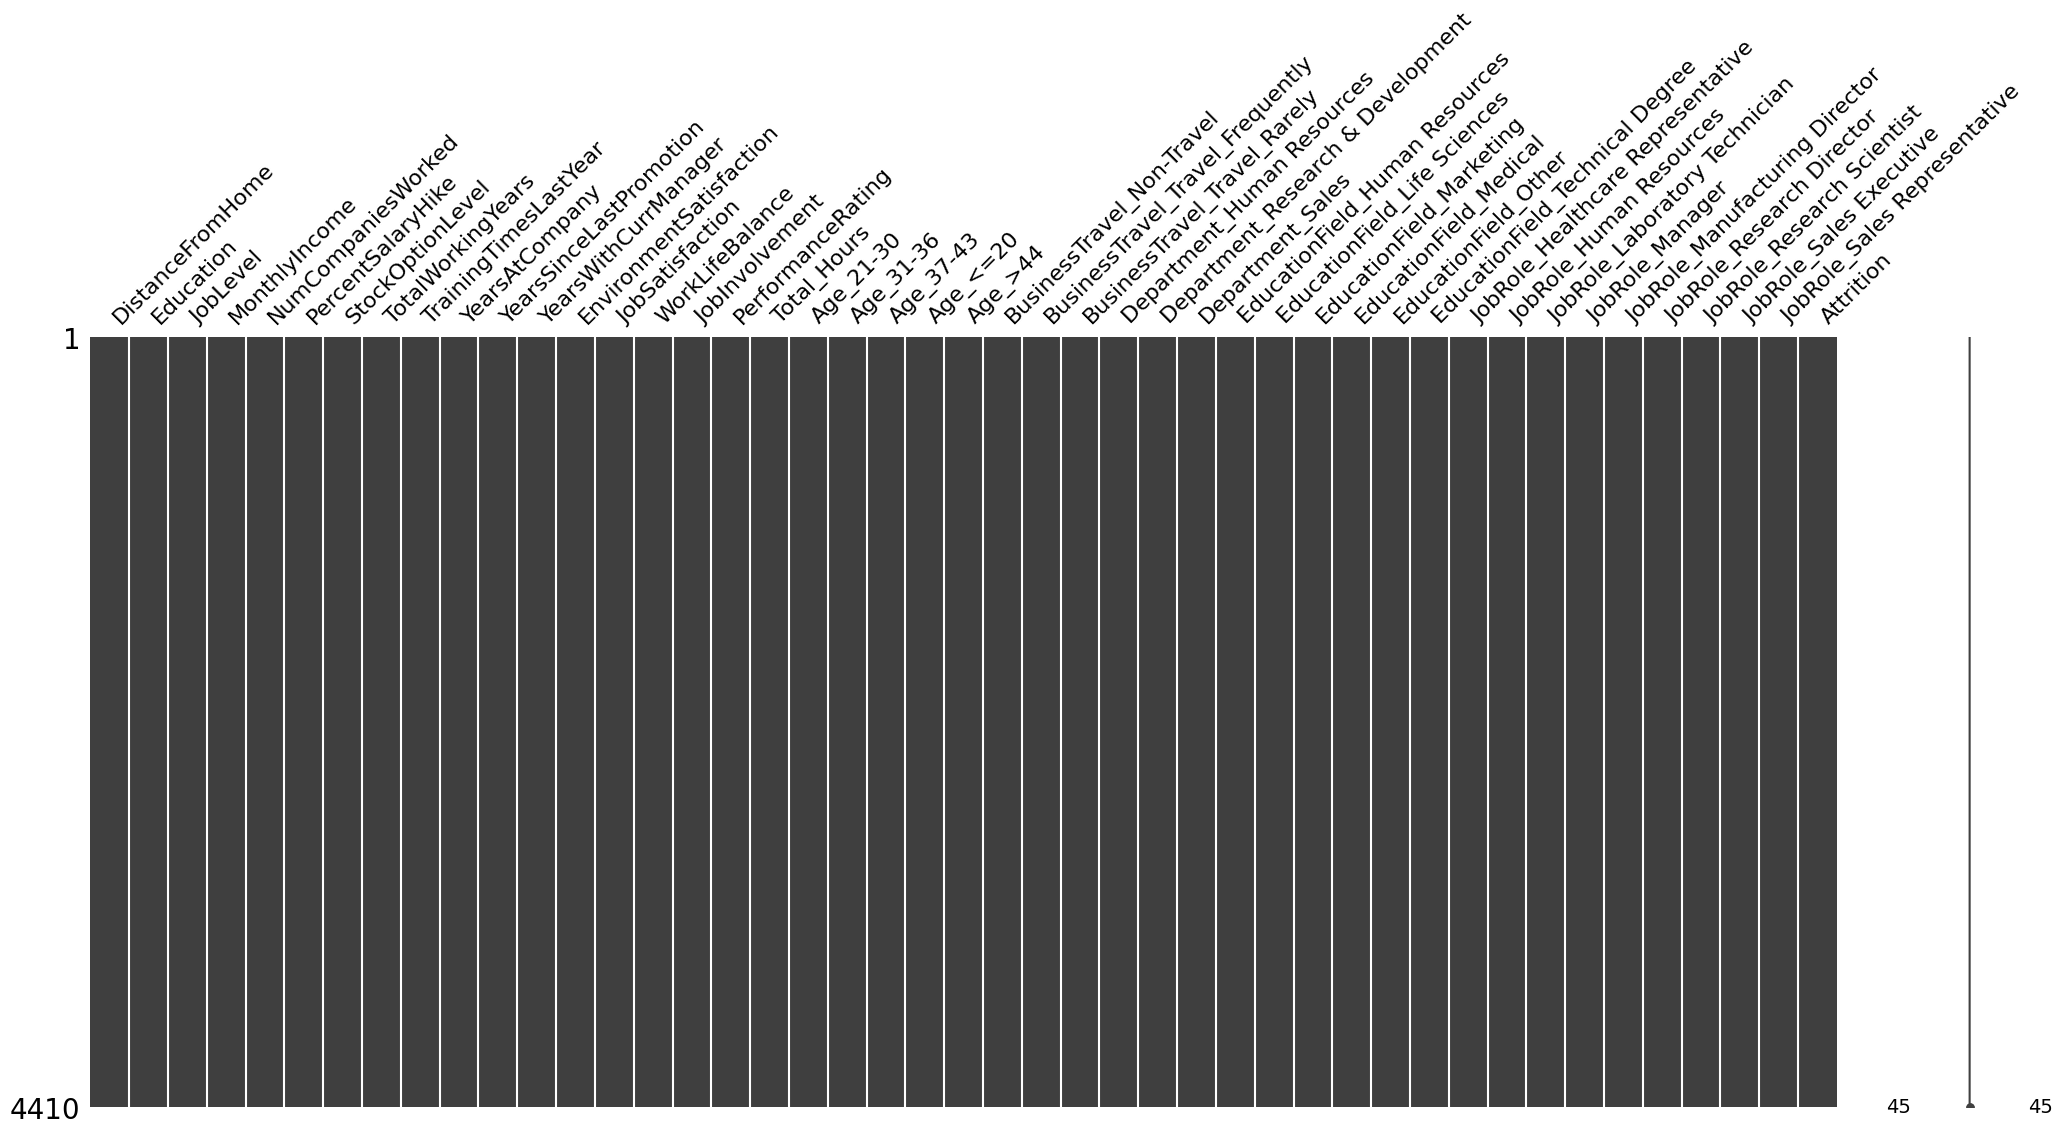

,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,...,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Attrition
count,4410.0000,4410.0000,4410.0000,4410.0000,4410.0000,4410.0000,4410.0000,4410.0000,4410.0000,4410.0000,...,4410.0000,4410.0000,4410.0000,4410.0000,4410.0000,4410.0000,4410.0000,4410.0000,4410.0000,4410.0000
mean,0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,0.0000,-0.0000,0.0000,-0.0000,...,0.0891,0.0354,0.1762,0.0694,0.0986,0.0544,0.1986,0.2218,0.0565,0.1612
std,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,...,0.2849,0.1847,0.3810,0.2541,0.2982,0.2269,0.3990,0.4155,0.2308,0.3678
min,-1.0109,-1.8684,-0.9615,-1.1673,-1.0795,-1.1506,-0.9320,-1.4507,-2.1720,-1.1443,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,-0.8875,-0.8917,-0.9615,-0.7632,-0.6785,-0.8772,-0.9320,-0.6789,-0.6202,-0.6545,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,-0.2705,0.0850,-0.0578,-0.3366,-0.2774,-0.3306,0.2420,-0.1643,0.1557,-0.3279,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
75%,0.5932,1.0618,0.8459,0.3988,0.5246,0.7627,0.2420,0.4789,0.1557,0.3252,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
max,2.4441,2.0385,2.6533,2.8676,2.5297,2.6759,2.5900,3.6949,2.4834,5.3869,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [64]:
check_missing_values(processed_df)
processed_df.describe()

Toutes les colonnes sont biens remplies, il y a donc plus de valeurs manquantes et nous pouvons continuer.

### X. <a id='missing-check'>EDA</a> <br>
 A présent, on va venir réaliser une analyse exploratoire des données pour mieux comprendre les différentes variables et leur impact sur l'attrition des employés.

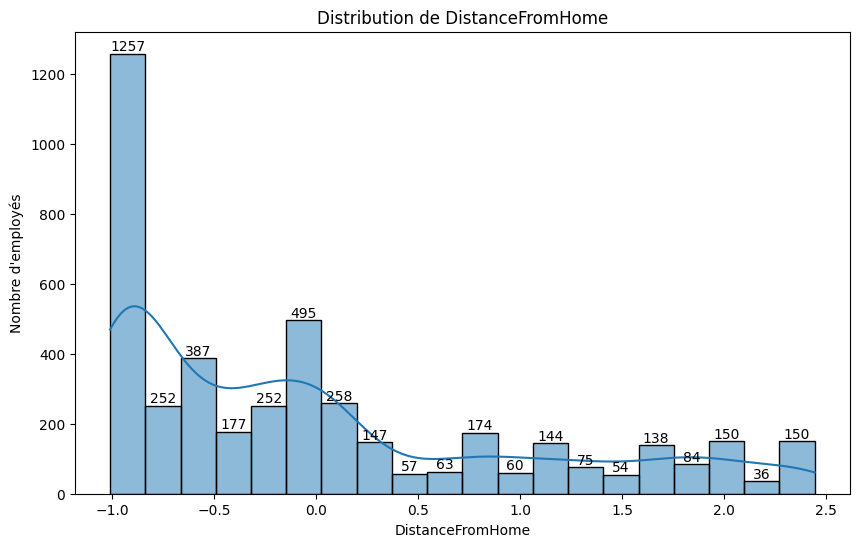

--------------------------------


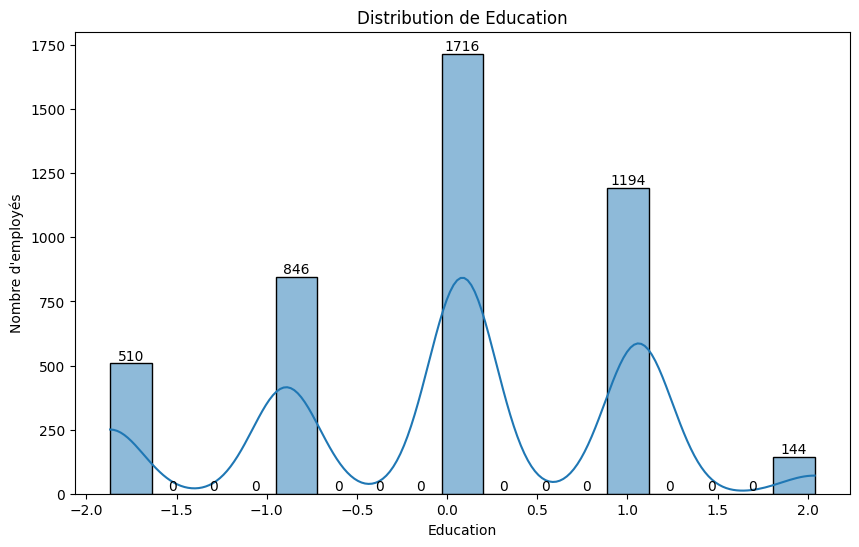

--------------------------------


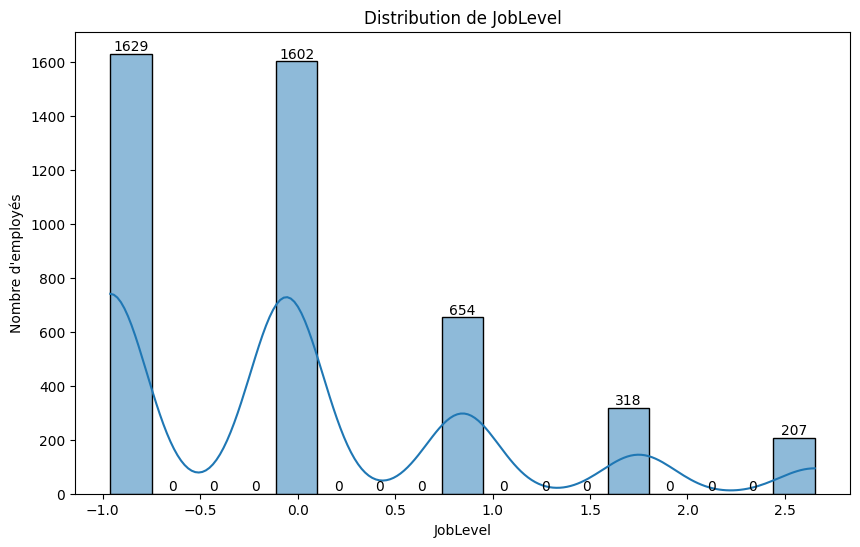

--------------------------------


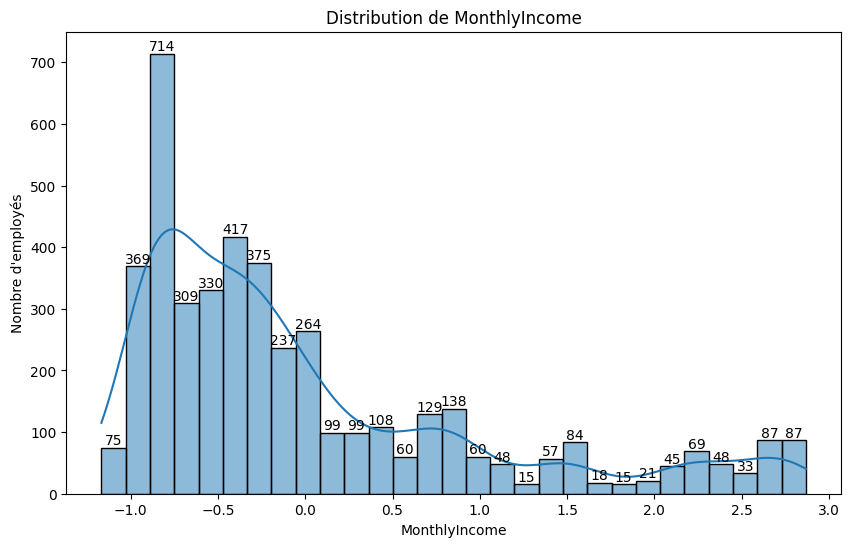

--------------------------------


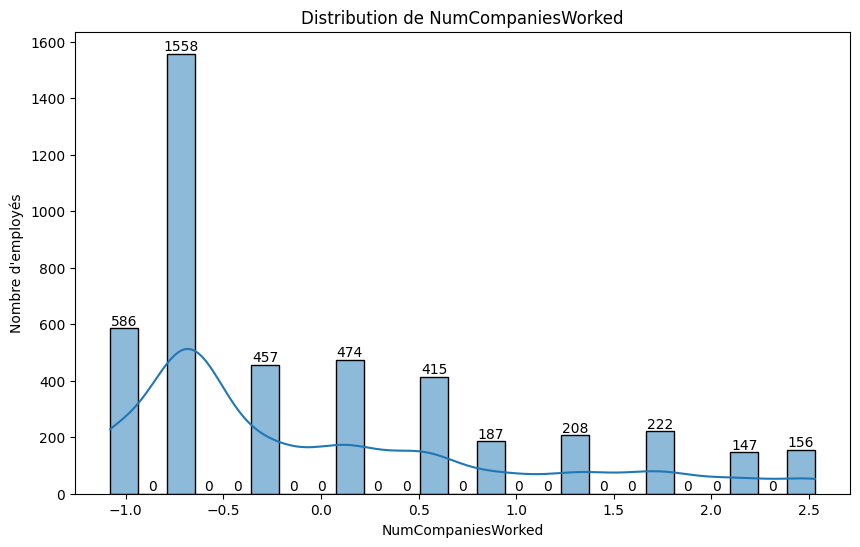

--------------------------------


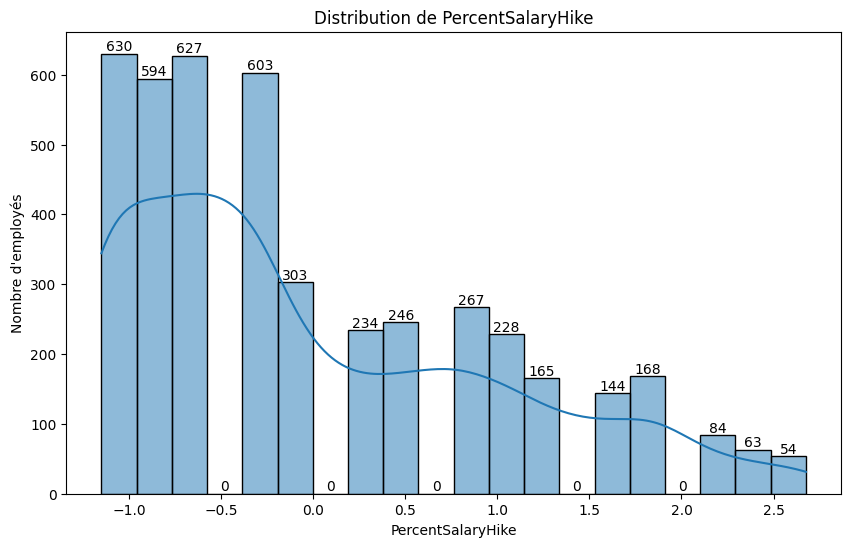

--------------------------------


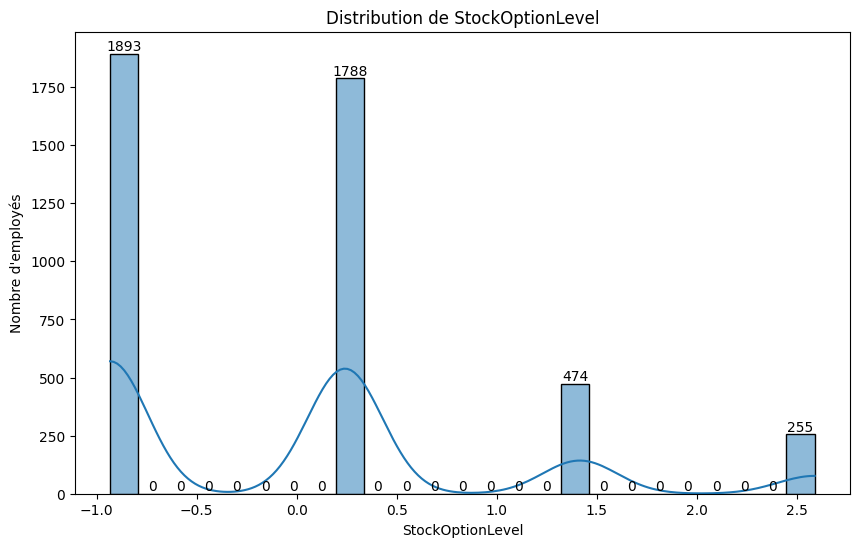

--------------------------------


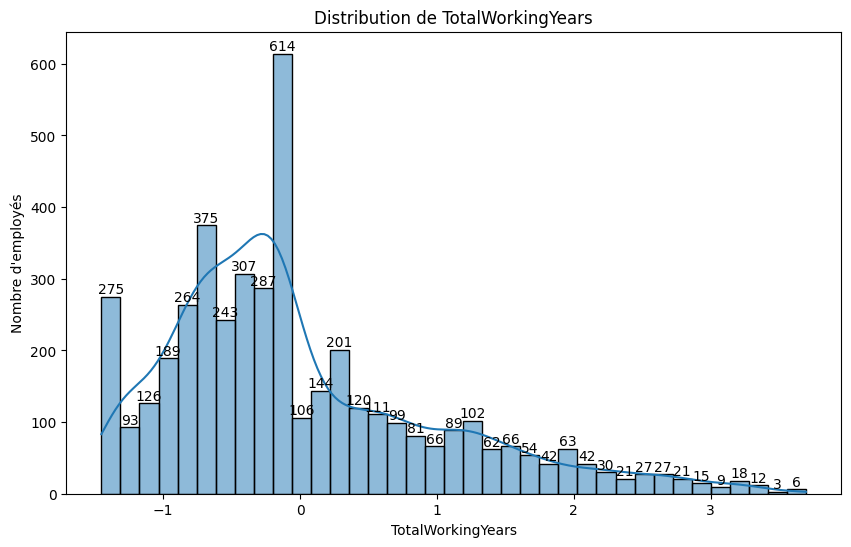

--------------------------------


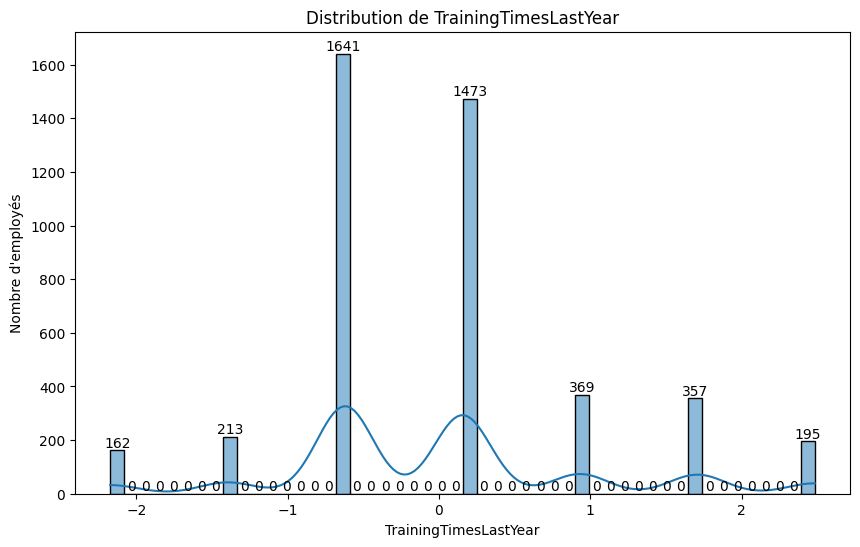

--------------------------------


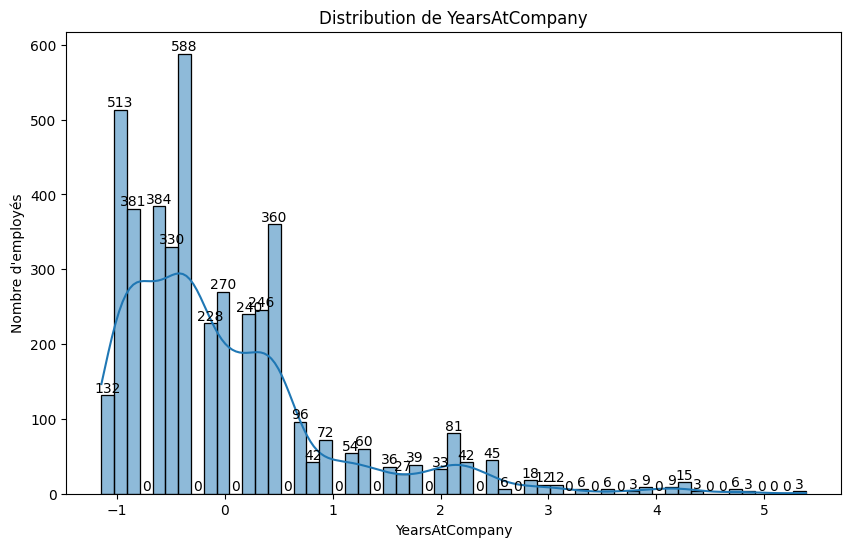

--------------------------------


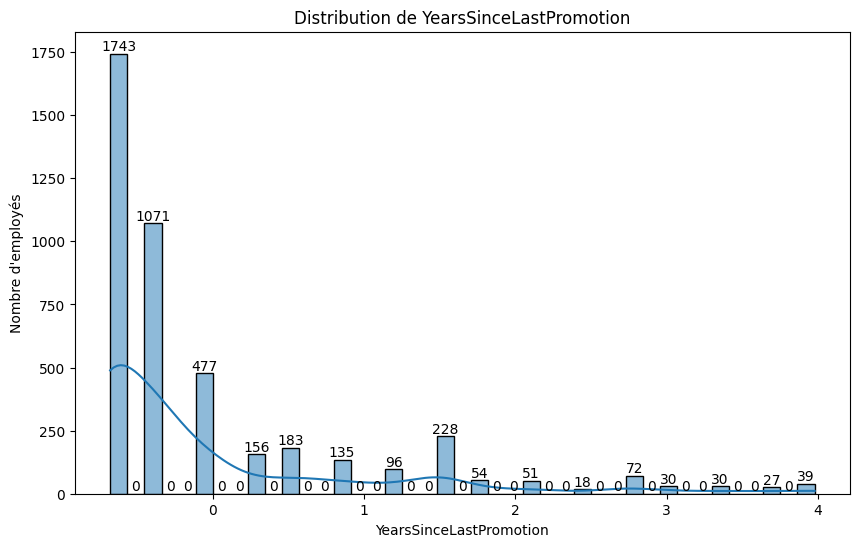

--------------------------------


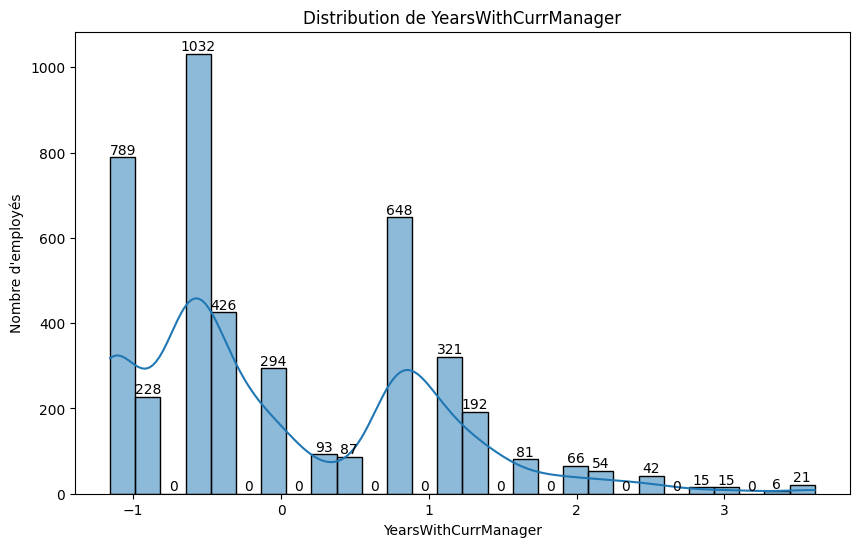

--------------------------------


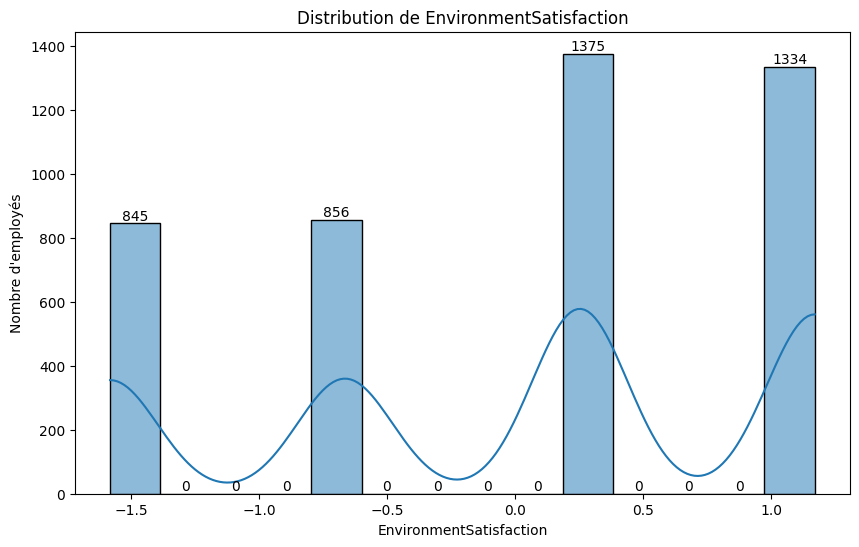

--------------------------------


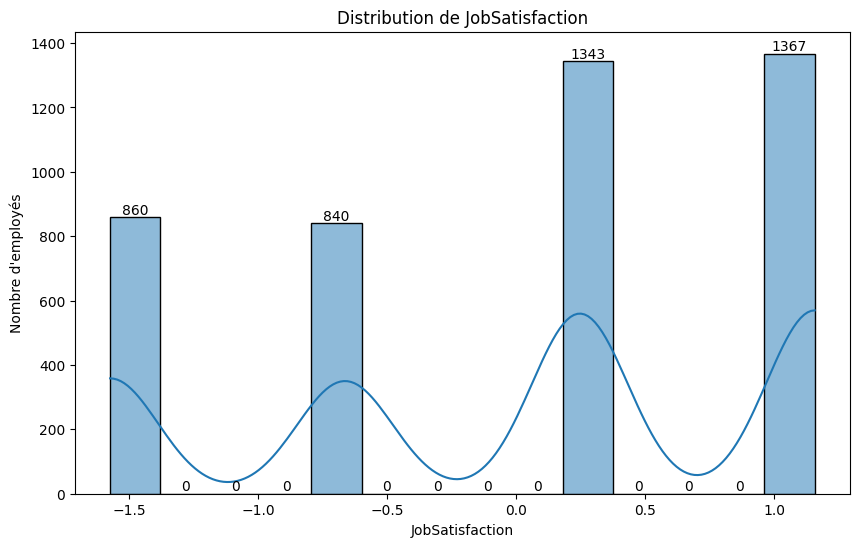

--------------------------------


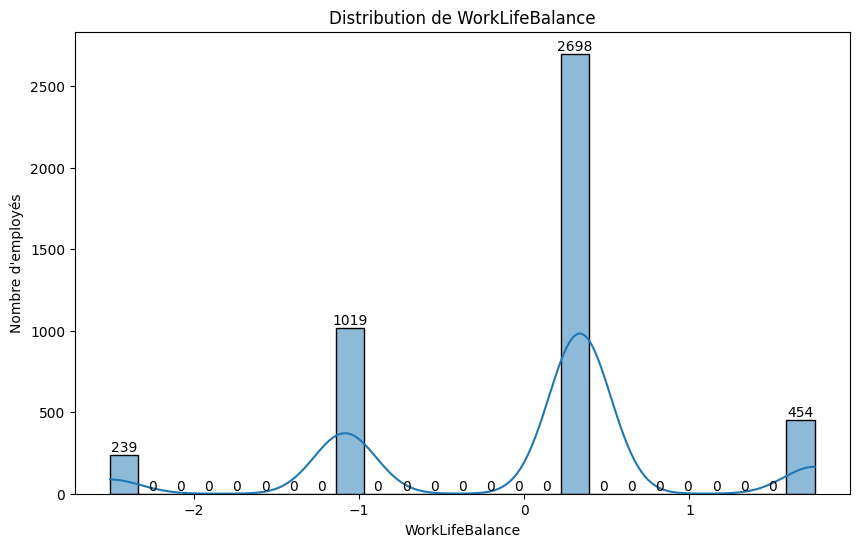

--------------------------------


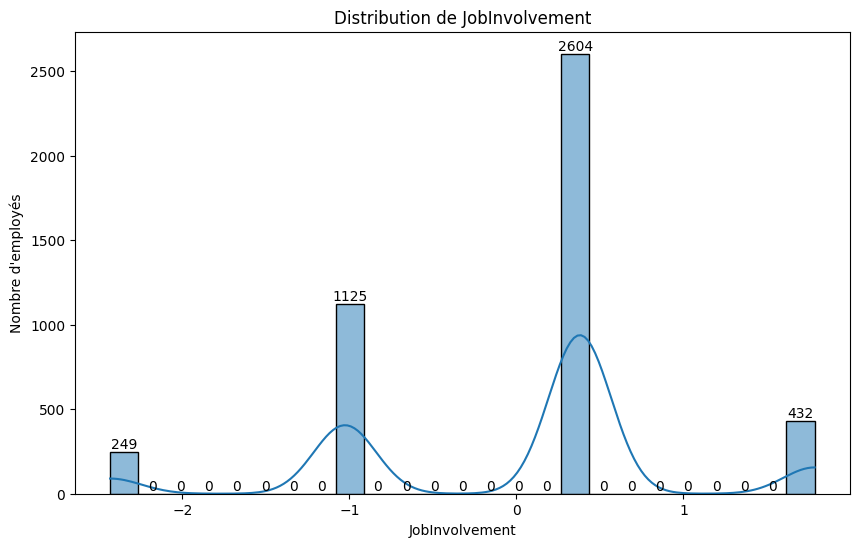

--------------------------------


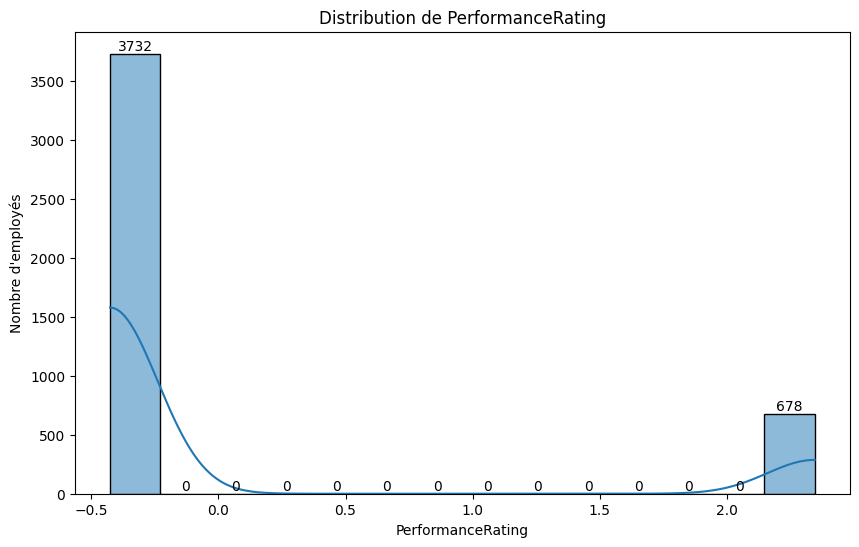

--------------------------------


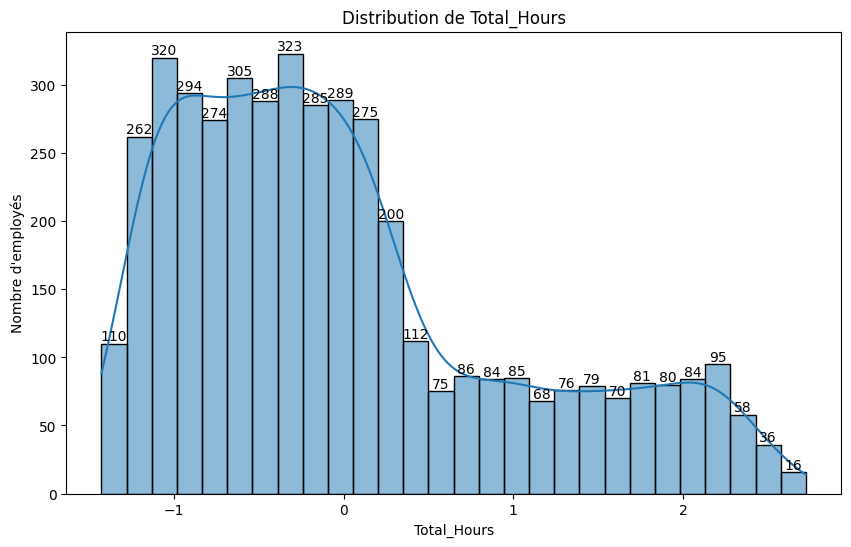

--------------------------------


In [65]:
# Analyse des colonnes numériques
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    ax = sns.histplot(processed_df[column], kde=True)
    plt.title(f'Distribution de {column}')
    plt.xlabel(column)
    plt.ylabel('Nombre d\'employés')

    for i in ax.containers:
        ax.bar_label(i)

    plt.show()
    print(DELIMITER)

Les graphiques ci-dessus correspondent à la distribution des différentes variables numériques dans notre dataset. <br>


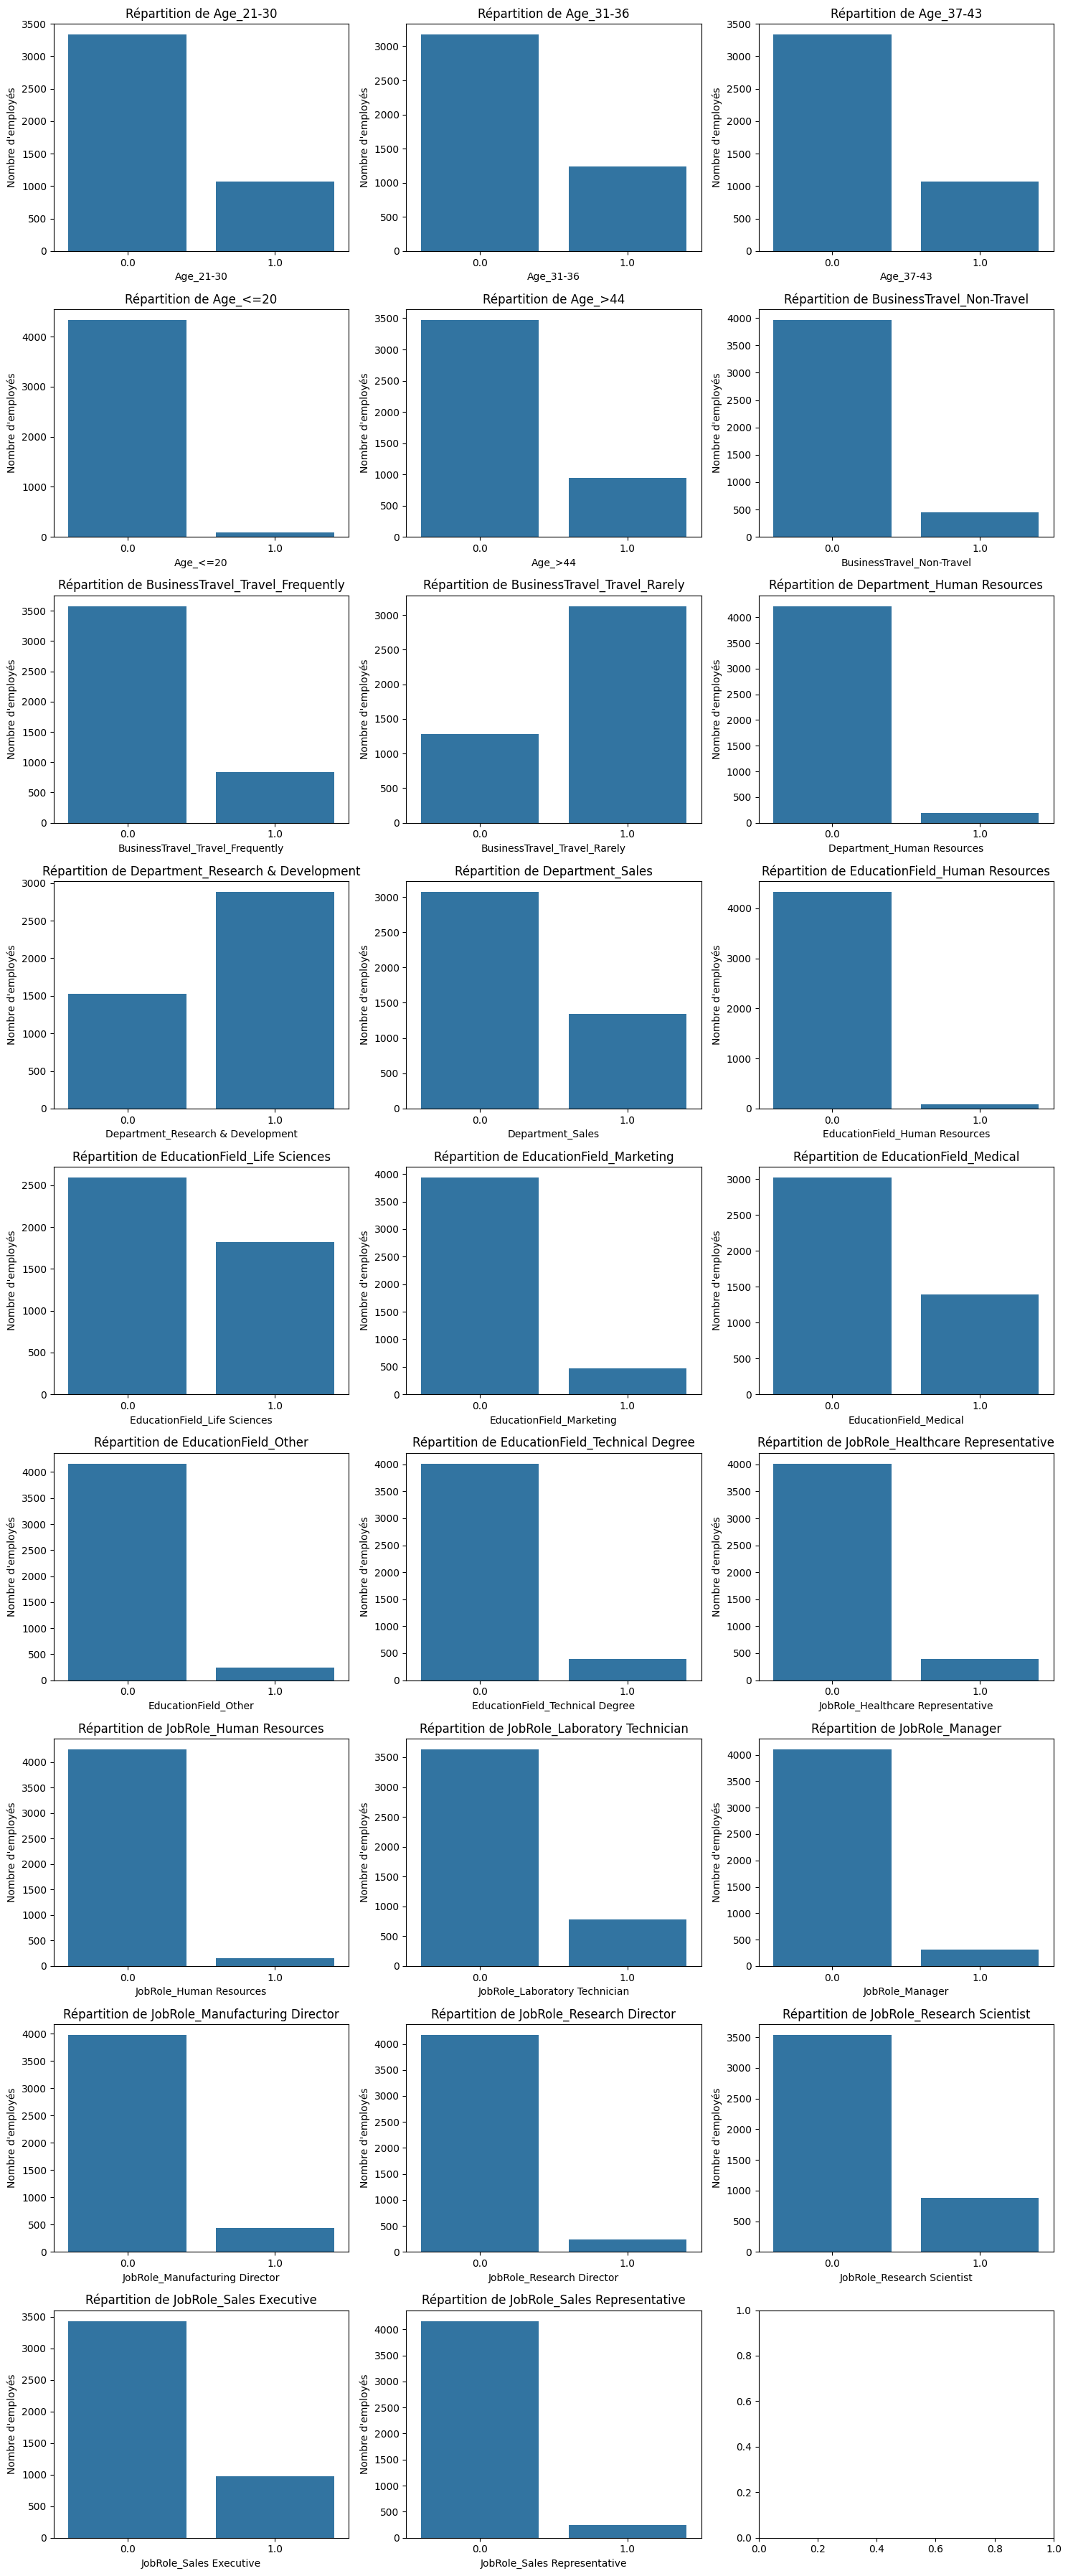

In [66]:
# Définir la disposition :
num_cols = 3
num_rows = (len(cat_one_hot_columns) + 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))

axes = axes.flatten() if num_rows > 1 else [axes]

for i, column in enumerate(cat_one_hot_columns):
    sns.countplot(data=processed_df, x=column, ax=axes[i])
    axes[i].set_title(f'Répartition de {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Nombre d\'employés')

# Ajuster l'espace entre les sous-graphiques
plt.tight_layout()
plt.show()


On remarque que les variables numériques suivent une distribution normale, ce qui est un bon point pour l'entraînement des modèles. <br>
Pour les variables catégorique, on peut voir que les employés célibataires ont plus tendance à quitter l'entreprise. De plus, les employés qui voyagent fréquemment ont également plus de chances de quitter l'entreprise.

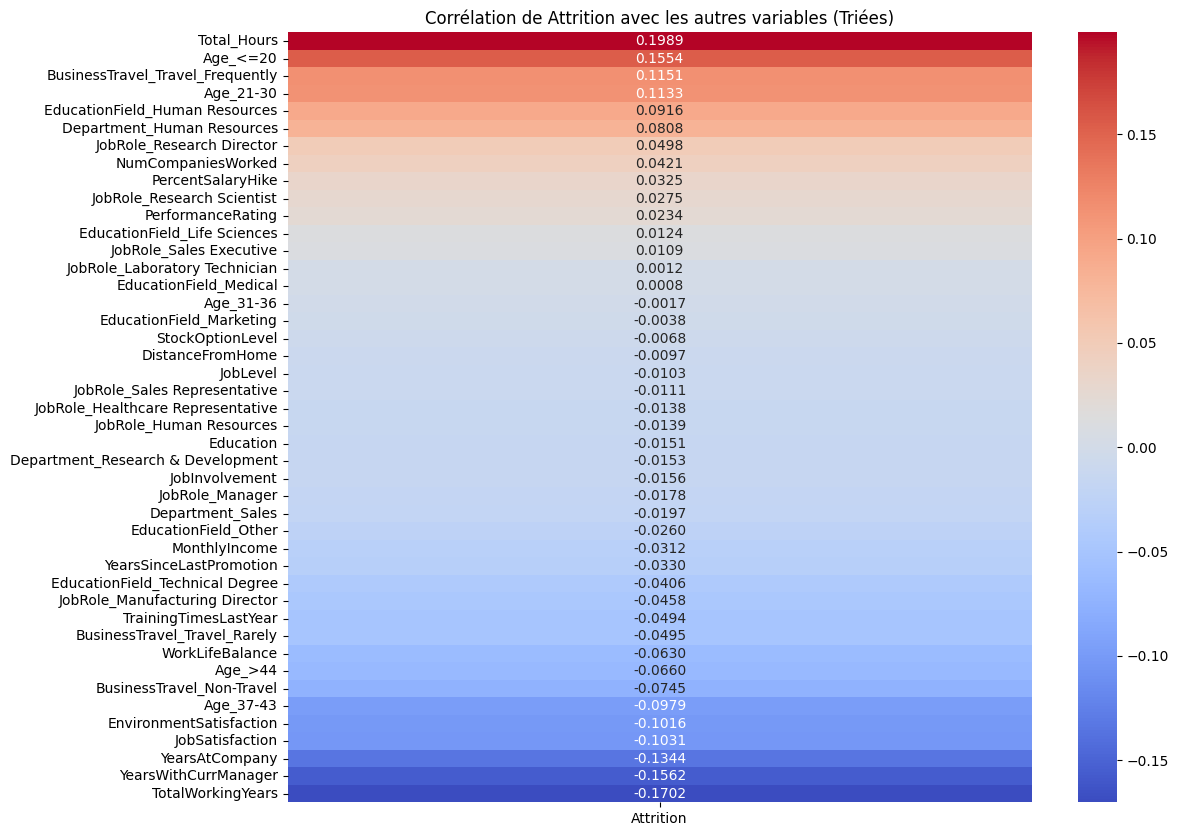

In [67]:
# Créer la matrice de corrélation
corr_matrix = processed_df.corr()

# Extraire la ligne de corrélation de 'Attrition'
corr_attrition = corr_matrix.loc['Attrition'].drop('Attrition')  # Supprimer la corrélation d'Attrition avec lui-même

# Trier les corrélations par ordre décroissant
corr_attrition_sorted = corr_attrition.sort_values(ascending=False)

# Visualiser uniquement la ligne de corrélation d'Attrition
plt.figure(figsize=(12, 10))
sns.heatmap(corr_attrition_sorted.to_frame(), annot=True, fmt='.4f', cmap='coolwarm', cbar=True)

# Ajouter le titre
plt.title('Corrélation de Attrition avec les autres variables (Triées)')
plt.show()


On remarque alors que certaines variables ont un coefficient positif vis-à-vis de notre variable cible. Nous allons afficher la répartition de l'attrition selon ces variables.

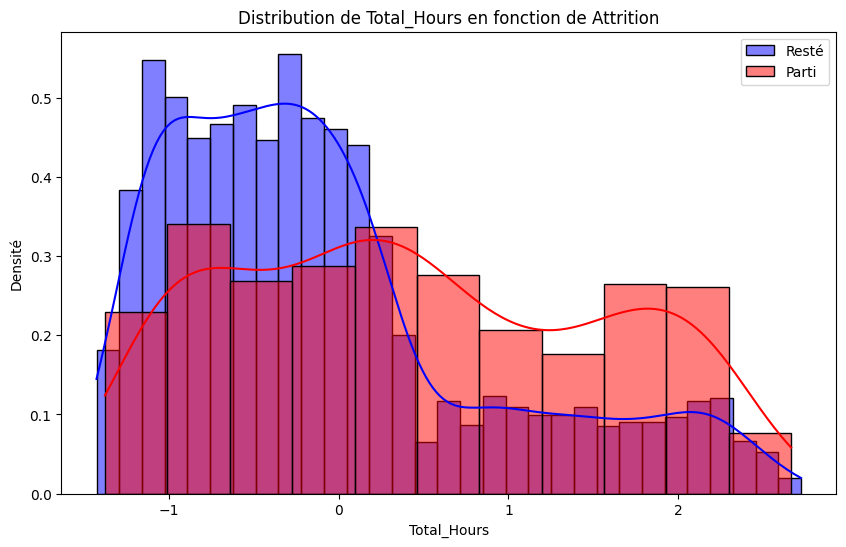

--------------------------------


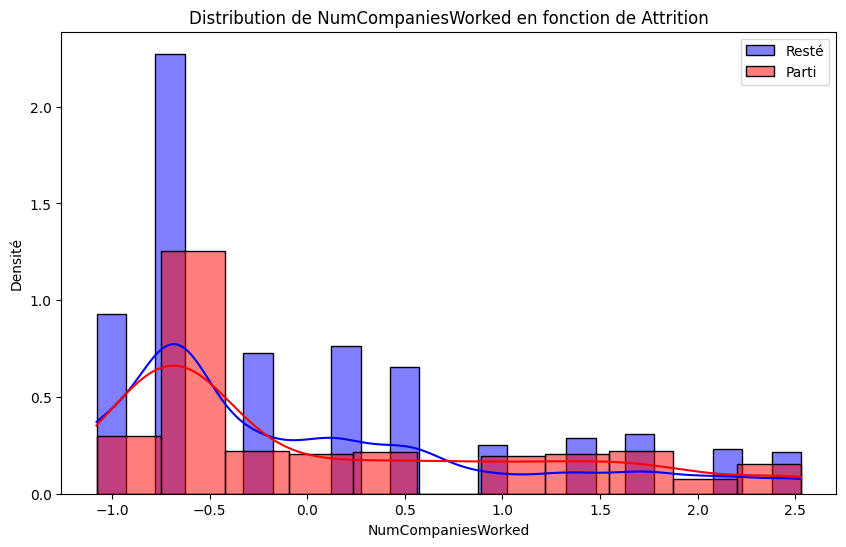

--------------------------------


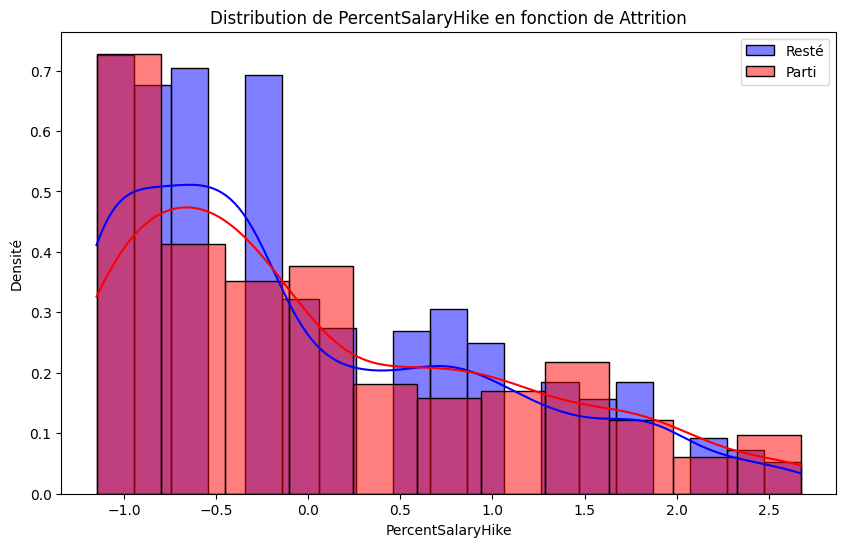

--------------------------------


In [68]:
# Analyse des colonnes numériques en fonction d'Attrition
correlation_columns = ['Total_Hours', 'NumCompaniesWorked', 'PercentSalaryHike']
for column in correlation_columns:
    plt.figure(figsize=(10, 6))

    # Séparer les données en fonction de 'Attrition' (0 = resté, 1 = parti)
    sns.histplot(processed_df[processed_df['Attrition'] == 0][column], kde=True, color='blue', label='Resté',
                 stat='density')
    sns.histplot(processed_df[processed_df['Attrition'] == 1][column], kde=True, color='red', label='Parti',
                 stat='density')

    # Ajouter le titre et les légendes
    plt.title(f'Distribution de {column} en fonction de Attrition')
    plt.xlabel(column)
    plt.ylabel('Densité')
    plt.legend()

    # Ajouter des labels aux barres
    plt.show()
    print(DELIMITER)


On remarque que pour une approche linéaire, les variables les plus corrélées avec l'attrition sont : Total_Hours, MaritalStatus_Single, BusinessTravel_Travel_Frequently, EducationField_Human Resources, Department_Human Resources, JobRole_Research Director et NumCompaniesWorked


Cependant, il faut faire attention car il s'agit seulement des relations linéaires, il est possible que d'autres variables aient un impact sur l'attrition des employés.

### 7. <a id='doublons'>Entrainement et évaluation des modèles</a>

Afin d'obtenir un résultat précis, on vient utiliser la classe StratifiedShuffleSplit pour obtenir des splits stratifiés. On va ensuite entraîner différents modèles de classification pour prédire l'attrition des employés.

In [69]:
def train_and_evaluate_model(models_selected, n_split):
    stratified_split = StratifiedShuffleSplit(n_splits=n_split, test_size=0.2, random_state=42)

    # Initialisation des dictionnaires pour stocker les résultats
    accuracies = {}
    roc_aucs = {}
    f1_scores = {}
    precisions = {}
    recalls = {}
    training_time_taken = {}
    predict_time_taken = {}

    # Initialisation des listes pour chaque modèle
    for model in models_selected:
        model_name = model.__class__.__name__
        accuracies[model_name] = []
        roc_aucs[model_name] = []
        f1_scores[model_name] = []
        precisions[model_name] = []
        recalls[model_name] = []
        training_time_taken[model_name] = []
        predict_time_taken[model_name] = []

    for train_index, test_index in stratified_split.split(processed_df, processed_df['Attrition']):
        strat_train_set = processed_df.loc[train_index]
        strat_test_set = processed_df.loc[test_index]

        data_train_set = strat_train_set.drop(['Attrition'], axis=1)
        data_labels = strat_train_set['Attrition'].copy()
        data_test_set = strat_test_set.drop(['Attrition'], axis=1)
        data_labels_test = strat_test_set['Attrition'].copy()

        # Entraînement et évaluation de chaque modèle
        for model in models_selected:
            model_name = model.__class__.__name__

            start_time = time.time()
            model.fit(data_train_set, data_labels)
            end_time = time.time()

            start_time_2 = time.time()
            y_pred = model.predict(data_test_set)
            end_time_2 = time.time()

            y_proba = model.predict_proba(data_test_set)[:, 1]

            # Évaluation des performances pour ce split
            accuracy = accuracy_score(data_labels_test, y_pred)
            roc_auc = roc_auc_score(data_labels_test, y_proba)
            f1 = f1_score(data_labels_test, y_pred)
            precision = precision_score(data_labels_test, y_pred)
            recall = recall_score(data_labels_test, y_pred)

            accuracies[model_name].append(accuracy)
            roc_aucs[model_name].append(roc_auc)
            f1_scores[model_name].append(f1)
            precisions[model_name].append(precision)
            recalls[model_name].append(recall)
            training_time_taken[model_name].append(end_time - start_time)
            predict_time_taken[model_name].append(end_time_2 - start_time_2)

    # Création du DataFrame des résultats
    results_df = pd.DataFrame({
        'Model': list(accuracies.keys()),
        'Average Accuracy': [np.mean(acc) for acc in accuracies.values()],
        'Average ROC AUC': [np.mean(roc) for roc in roc_aucs.values()],
        'Average F1 Score': [np.mean(f1) for f1 in f1_scores.values()],
        'Average Precision': [np.mean(prec) for prec in precisions.values()],
        'Average Recall': [np.mean(rec) for rec in recalls.values()],
        'Average Training Time (s)': [np.mean(time_t) for time_t in training_time_taken.values()],
        'Average Predict Time (s)': [np.mean(time_t) for time_t in predict_time_taken.values()]
    })

    # Création d'un DataFrame détaillé pour le boxplot
    metrics_data = []
    for model_name in accuracies.keys():
        for i in range(n_split):
            metrics_data.append(['Accuracy', model_name, accuracies[model_name][i]])
            metrics_data.append(['ROC AUC', model_name, roc_aucs[model_name][i]])
            metrics_data.append(['F1 Score', model_name, f1_scores[model_name][i]])
            metrics_data.append(['Precision', model_name, precisions[model_name][i]])
            metrics_data.append(['Recall', model_name, recalls[model_name][i]])

    df_metrics = pd.DataFrame(metrics_data, columns=['Metric', 'Model', 'Value'])
    metrics_list = ['Accuracy', 'ROC AUC', 'F1 Score', 'Precision', 'Recall']

    plt.figure(figsize=(15, 10))

    for i, metric in enumerate(metrics_list, 1):
        plt.subplot(2, 3, i)
        sns.boxplot(x='Model', y='Value', data=df_metrics[df_metrics['Metric'] == metric], palette="Set2")
        plt.title(f"Boxplot de {metric}")
        plt.xlabel("Modèle")
        plt.ylabel(metric)
        plt.grid(True)

    plt.tight_layout()
    plt.show()
    print("\nRésultats finaux :")
    return results_df


In [70]:
# Initialisation des modèles
decision_tree_model = DecisionTreeClassifier(random_state=18)
logistic_model = LogisticRegression(random_state=18)
pd.set_option('display.float_format', '{:.4f}'.format)

models = [decision_tree_model, logistic_model]

# Appel de la fonction pour obtenir les résultats des modèles
results_df = train_and_evaluate_model(models, 5)

# Retourne les résultats pour les utiliser dans l'étape suivante
results_df


NameError: name 'accuracy_score' is not defined

L’évaluation des modèles montre que DecisionTreeClassifier surpasse LogisticRegression sur plusieurs aspects, ce qui en fait le meilleur choix des deux. <br>
Nous allons donc utiliser les hyperparamètres afin de l’optimiser davantage et améliorer ses performances.

In [ ]:
param_grids = {
    "DecisionTreeClassifier": {
        "max_depth": [5, 10, 20, 25, None],
        'splitter': ['best', 'random'],
        'min_samples_leaf': [1, 2, 5, 10]
    }
}
best_params = {}
best_scores = {}
model = DecisionTreeClassifier()
model_name = model.__class__.__name__

X = processed_df.drop('Attrition', axis=1)
y = processed_df['Attrition']

# GridSearchCV
grid_search = GridSearchCV(
    model, param_grids[model_name],
    cv=5, scoring="accuracy"
)

grid_search.fit(X, y)

print(f"Meilleurs paramètres pour {model_name} : {grid_search.best_params_}")
print(f"Score (Accuracy) : {grid_search.best_score_:.4f}")

final_model = DecisionTreeClassifier(max_depth=25, min_samples_leaf=1, splitter='random')
train_and_evaluate_model([final_model], 5)


Meilleurs paramètres pour DecisionTreeClassifier : {'max_depth': 20, 'min_samples_leaf': 1, 'splitter': 'random'}
Score (Accuracy) : 0.9921


NameError: name 'StratifiedShuffleSplit' is not defined

In [2]:
importances = decision_tree_model.feature_importances_
feature_importances = pd.Series(importances, index=final_columns[:-1])
feature_importances

NameError: name 'decision_tree_model' is not defined

In [1]:
# Trier les importances des features par ordre décroissant
sorted_importances = feature_importances.sort_values(ascending=False)

# Créer le graphique en barres
plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_importances, y=sorted_importances.index, palette="viridis")

# Ajouter les titres et les labels
plt.title('Importance des Features')
plt.xlabel('Importance')
plt.ylabel('Features')

# Afficher le graphique
plt.show()

NameError: name 'feature_importances' is not defined